# Fundamentals of Statistics

Having the knowledge of statistics in data science is essential. In this notebook I will go over some key elements, words and etc where you can get the feel of it.

In mathematics there are different types of data:
* Numeric: numbers such as 1, 3, 9, -1, 2.3, ... 
    That this category is splitted into two main categories:
    * Continuous: any values between integer values.
    * Discrete: integer values
* Categorial
    This type has also numeric and words to express the vairables. Such as
    * Binary: 0/1, True/False
    * Ordinal: This type has specific ordering. 
    
In statistics there are terms which we will face with them whenever we deal with data. These terms are:
* Mean: average of all values devided by the number of values.
* Weighted Mean: Sum of all values multiplied by the weight then devided by the sum of all weights.
* Median: It is a value in a dataset which half of the dataset sits below it and the rest have above it. 
* Percentile: A value that p percentage of the data lies below.
* Weighted median: The value that the one-half of the sum of the weights lies below and the rest half above it. 
* Trimmed mean: The average of all values after removing extreme values.
* Outlier: The data point which doesn't follow the general trend of the data.
* Variance: The expectation value of the difference of each data points from the mean of the dataset devided by the (total number of data points-1), often it is called mean-squared error.
* Standard deviation: Is the square root of the variance. 




Now we want to see how to compute the above defined words. The dataset is from the [world bank](https://databank.worldbank.org/indicator/NY.GDP.MKTP.CD/1ff4a498/Popular-Indicators#) where the GDP of most of the counties are recorded. 

In [13]:
import os
os.chdir(r'/home/mn/Work/GitHub/Statistics/Popular Indicators')

In [14]:
import matplotlib.pyplot as plt
import pylab as p
import numpy as np
import pandas as pd
from numpy import random

df = pd.read_csv('1d633b4c-d74c-494a-941c-fe25b69fa39d_Data.csv')

Let's look at the list of the countries in the dataset:

In [9]:
df['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Fij

Here I want to extract the data only from the United States of America



In [ ]:
USA = df[df['Country Name']=='United States']

Now it is time to get the GDP data of the USA:

In [17]:
USA_GDP = USA[USA['Series Name'] == "GDP per capita (current US$)"]
USA_GDP

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
10622,GDP per capita (current US$),NY.GDP.PCAP.CD,United States,USA,36334.9087770589,37133.2428088526,38023.1611144021,39496.4858751381,41712.8010675545,44114.7477810544,46298.7314440927,47975.9676958038,48382.5584490552,47099.9804711343,48466.6576026922,49882.5581321495,51602.9310457907,53106.5367672165,55049.9883272312,56863.3714957652


Apparently the data is from the year 2000 to 2015. Let's plot the GDP data through these years. 

In [98]:
GDP_values = USA_GDP[['2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]']]

print("The GDP values for all years from 2000 to 2015\n", GDP_values)

# create a discrete numeric array from 2000 to 2015
x = np.linspace(2000,2015,16)
y = GDP_values.values


The GDP values for all years from 2000 to 2015
           2000 [YR2000]     2001 [YR2001]     2002 [YR2002]     2003 [YR2003]  \
10622  36334.9087770589  37133.2428088526  38023.1611144021  39496.4858751381   

          2004 [YR2004]     2005 [YR2005]     2006 [YR2006]     2007 [YR2007]  \
10622  41712.8010675545  44114.7477810544  46298.7314440927  47975.9676958038   

          2008 [YR2008]     2009 [YR2009]     2010 [YR2010]     2011 [YR2011]  \
10622  48382.5584490552  47099.9804711343  48466.6576026922  49882.5581321495   

          2012 [YR2012]     2013 [YR2013]     2014 [YR2014]     2015 [YR2015]  
10622  51602.9310457907  53106.5367672165  55049.9883272312  56863.3714957652  


The plot of GDP vs. years looks linear so we didn't expect any other than that. 

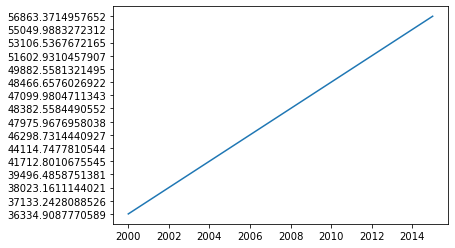

In [90]:
plt.plot(x, y[0])

In [168]:
GDPS = []
sum_GDP =0

# calculate the sum of all GDPs
for GDP in y[0]:
    sum_GDP = sum_GDP + float(GDP)
    GDPS.append(GDP)
    
print("The average of the GDPs is: ", sum_GDP/len(GDP))

The average of the GDPs is:  46346.53930343699


## Weighted Mean

Now let's work on the weighted mean. Here, the numbers are made by random generator. The weights and numbers are generated randomly from the [numpy](https://numpy.org/doc/1.16/reference/routines.random.html) library. 

In [26]:
weights = []
nums = []

for i in range(0,20):
    weights.append(random.rand(1)[0])
    nums.append(random.randint(10))

In [27]:
print("The list of numbers are:\n ", nums, "\n\nAnd the list of weights is:\n", weights)

The list of numbers are:
  [9, 5, 8, 0, 9, 6, 4, 3, 0, 1, 0, 6, 5, 2, 2, 5, 8, 8, 7, 0] 

And the list of weights is:
 [0.8644794300545998, 0.26420330756000265, 0.3598161964275147, 0.6219193679203014, 0.9738020779272523, 0.6846879064930221, 0.343346239774423, 0.8799982885634318, 0.7820920174026474, 0.2702082620297578, 0.29880022894515046, 0.5277146463087466, 0.18511430600649503, 0.5190116274640558, 0.019318748778536787, 0.4657098785919809, 0.6362906103447775, 0.18161285133076377, 0.8650896390897158, 0.6884132523859433]


In [28]:
weight_multi_nums = 0
weight_sums = 0

for i in range(len(nums)):
    weight_multi_nums = weight_multi_nums + (weights[i]*nums[i])
    weight_sums = weight_sums + weights[i]
    
print("Weighted Mean:\n",weight_multi_nums/weight_sums)

Weighted Mean:
 4.719466200100577


## Median

To calculate the *median* we can use the [statistics](https://www.w3schools.com/python/ref_stat_median.asp) library. 

In [29]:
import statistics as stat

print("The Median value of numbers is:\n", stat.median(nums))

The Median value of numbers is:
 5.0


## Percentile
To calculate the *percentile* we can use [numpy](https://www.geeksforgeeks.org/numpy-percentile-in-python/) library. Let's calculate the percentiles of the numbers.  

In [173]:
percentiles = [25, 50, 75]

for percentile in percentiles:
    print("The ",percentile,"th percentile of the numbers is: ", np.percentile(nums,percentile))

The  25 th percentile of the numbers is:  2.0
The  50 th percentile of the numbers is:  5.5
The  75 th percentile of the numbers is:  7.0


## Weighted Median
To calculate the *weighted median* we use the [weigthedstats](https://pypi.org/project/weightedstats/)

In [177]:
import weightedstats as ws

print("The weighted median is:\n", ws.weighted_median(nums, weights))

The weighted median is:
 5


## Trimmed Mean
To calculate the *trimmed mean* we use the [scipy](https://www.statology.org/trimmed-mean-in-python/) library.

In [188]:
from scipy import stats

trims = [0.1, 0.2, 0.3, 0.4]

for trim in trims:
    print(trim*100,"% trimmed mean is: ",stats.trim_mean(nums, trim))

10.0 % trimmed mean is:  5.0625
20.0 % trimmed mean is:  5.083333333333333
30.0 % trimmed mean is:  5.375
40.0 % trimmed mean is:  5.5


## Outliers
To find the ouliers we need to caluclate the 25th and 75th percentile of the numbers then calculate the percentile difference. If the data points lie below (25th-1.5).(percentile difference) and above
(75th+1.5).(percentile difference) is an outlier. 

In [9]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

Here we create a dataset

In [22]:
seed(1)
# create the dataset
data = 23 * randn(200) + 100

# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=102.454 stdv=20.931


The created dataset has the mean around 100 and the standard deviation around 4.6

In [23]:
outliers = []

q25, q75 = np.percentile(sorted(data),[25,75])

q_diff = q75 - q25

lower_bound = q25 - (1.5*q_diff)
upper_bound = q75 + (1.5*q_diff)

for num in data:
    if (num <= lower_bound or num >= upper_bound):
        outliers.append(num)

print("The outliers are: ", outliers)

The outliers are:  [47.0646099717535, 43.99873142553581, 158.15149125654716]


## Variance & Standard Deviation.
Here, I use the data points which are used in calculating the outliers. 

In [32]:
print("The variance of the dataset is: ", stat.variance(data))
print("The standard deviation of the dataset is:", np.sqrt(stat.variance(data)))

The variance of the dataset is:  440.3107262373564
The standard deviation of the dataset is: 20.983582302299013
